<a href="https://colab.research.google.com/github/varshini03/nutritional-analysis/blob/main/NutritionStarbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

READING FILES

In [122]:
drinks = pd.read_csv('/content/starbucks_drinkMenu_expanded.csv')

In [123]:
drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [124]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [125]:
food = pd.read_csv('/content/starbucks-menu-nutrition-food.csv', encoding='utf-16-le')

In [126]:
food.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [127]:
food.columns

Index(['Unnamed: 0', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [128]:
food.rename(columns = {'Unnamed: 0' : 'Item'}, inplace = True)

In [129]:
for i in range(len(food.columns)):
  food.rename(columns = {food.columns[i] : food.columns[i].strip()}, inplace = True)

In [130]:
food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


EDA for drinks and food

In [131]:
numeric_columns = food.select_dtypes(include = 'number')

In [132]:
food_melted = pd.melt(numeric_columns)

In [133]:
food_melted

,variable,value
0,Calories,300.0
1,Calories,380.0
2,Calories,410.0
3,Calories,460.0
4,Calories,420.0
...,...,...
560,Protein (g),4.0
561,Protein (g),7.0
562,Protein (g),18.0
563,Protein (g),1.0


In [134]:
food_melted.value_counts()

variable     value
Fiber (g)    1.0      25
             2.0      25
             3.0      21
             0.0      14
Protein (g)  6.0      12
                      ..
Carb. (g)    7.0       1
Fiber (g)    8.0       1
             9.0       1
Carb. (g)    6.0       1
Protein (g)  34.0      1
Name: count, Length: 170, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


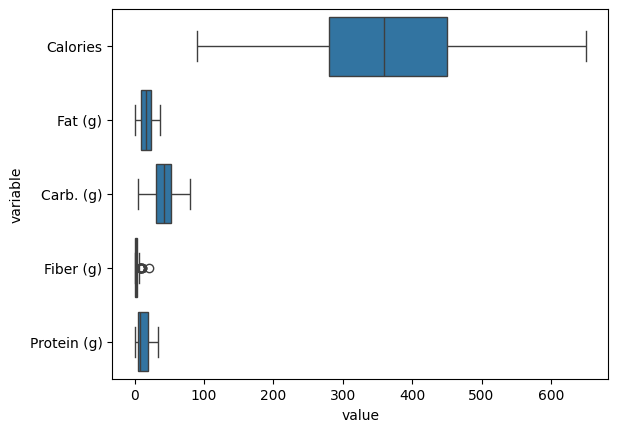

In [135]:
sns.boxplot(y = food_melted['variable'], x = food_melted['value'])
plt.show()

In [136]:
food_melted.groupby('variable').describe()

value                                                          
             count        mean         std   min    25%    50%    75%    max
variable                                                                    
Calories     113.0  356.637168  127.710685  90.0  280.0  360.0  450.0  650.0
Carb. (g)    113.0   41.486726   15.796764   5.0   31.0   42.0   53.0   80.0
Fat (g)      113.0   16.353982    8.297397   0.0    9.0   17.0   23.0   37.0
Fiber (g)    113.0    2.849558    2.888466   0.0    1.0    2.0    3.0   21.0
Protein (g)  113.0   11.469027    8.463230   1.0    5.0    8.0   19.0   34.0

In [137]:
food_melted['variable'].value_counts()

,count
variable,
Calories,113
Fat (g),113
Carb. (g),113
Fiber (g),113
Protein (g),113


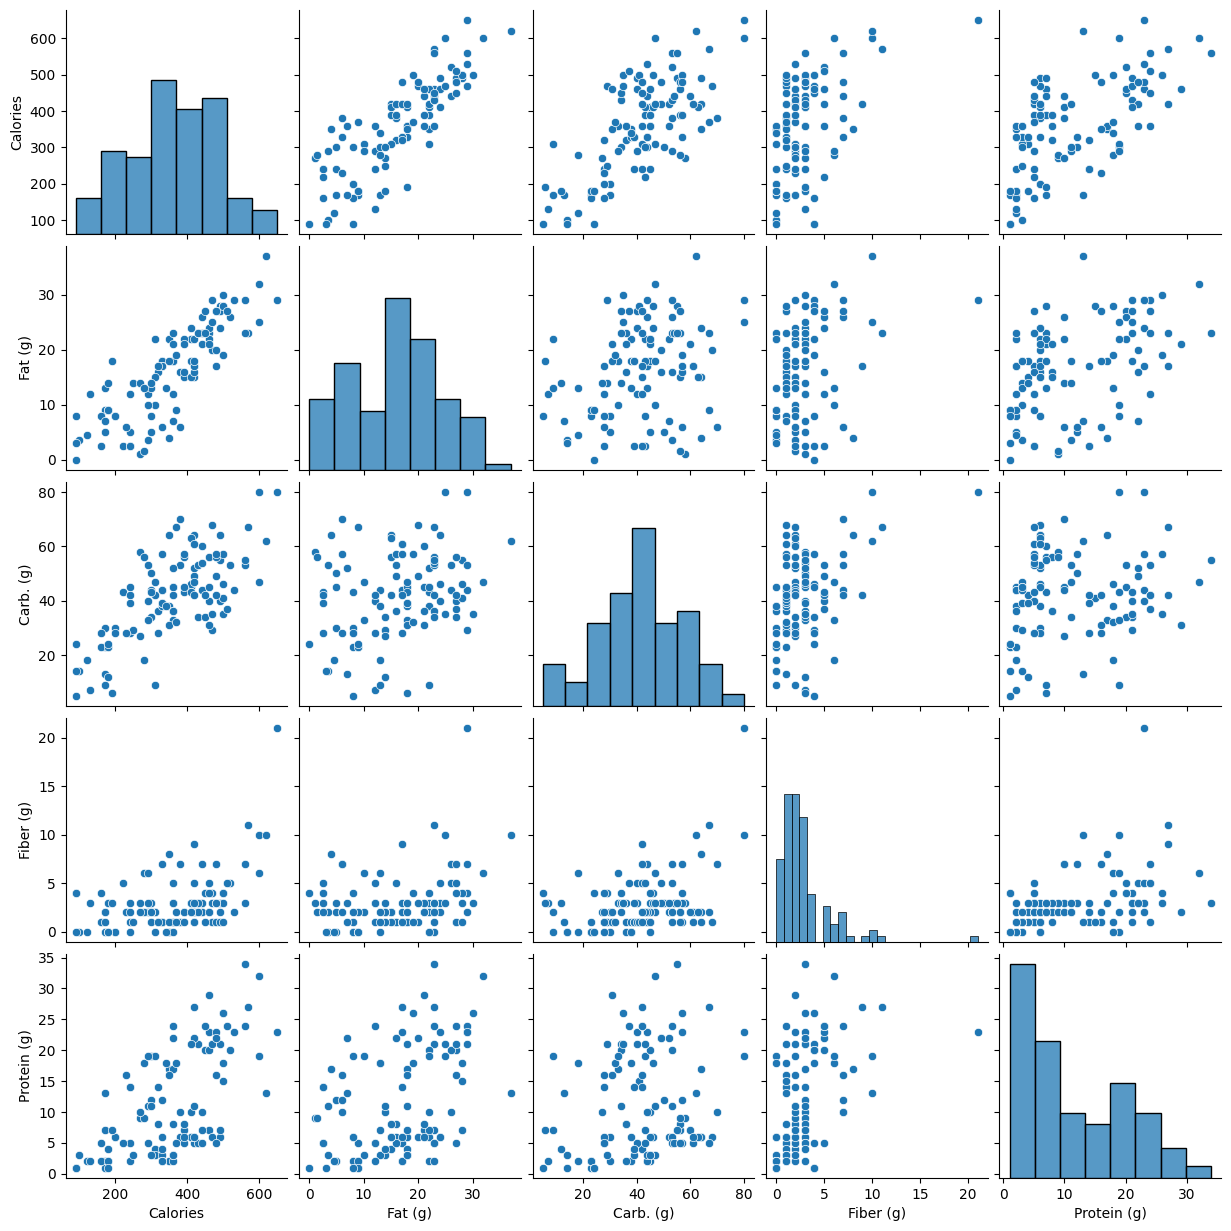

In [138]:
sns.pairplot(food)
plt.show()

CORRELATION MATRIX

In [139]:
cm = food.iloc[:,1:].corr()
cm

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
Calories,1.000000,0.828929,0.708496,0.471079,0.618962
Fat (g),0.828929,1.000000,0.281132,0.276059,0.423364
Carb. (g),0.708496,0.281132,1.000000,0.407655,0.204375
Fiber (g),0.471079,0.276059,0.407655,1.000000,0.472246
Protein (g),0.618962,0.423364,0.204375,0.472246,1.000000


<Axes: >

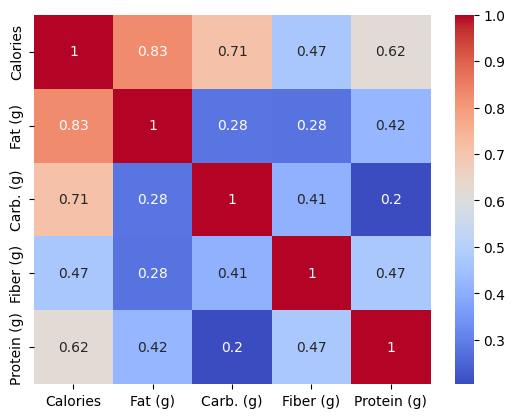

In [140]:
sns.heatmap(cm, annot=True, cmap='coolwarm')

we can conclude that fats, carbs and calories are highly correlated to each other

In [141]:
food.columns

Index(['Item', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)'], dtype='object')

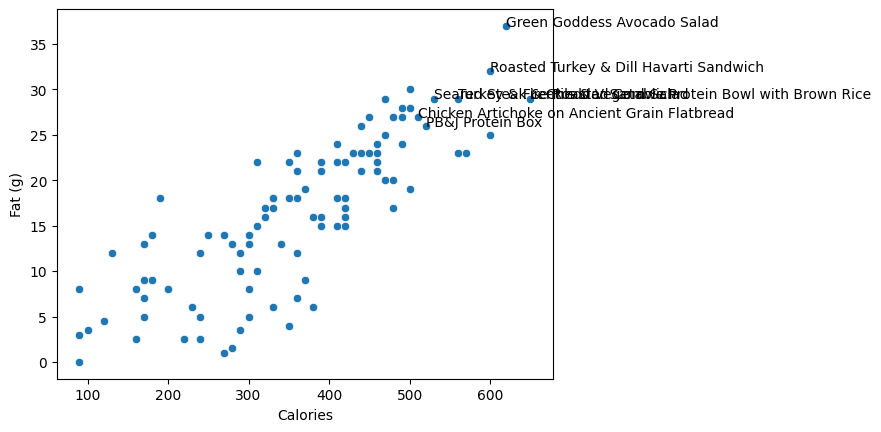

In [142]:
# calories vs fats bivariate graph
sns.scatterplot(data = food, x = 'Calories', y = 'Fat (g)')
cnt = 0
for i in range(len(food)):
  if(food['Calories'].iloc[i]>500 and food['Fat (g)'].iloc[i]>25):
    cnt = cnt+1
    plt.text(food['Calories'].iloc[i], food['Fat (g)'].iloc[i], food['Item'].iloc[i])
plt.show()

inference 1 : avoid the marked ones for less calories and fats

In [143]:
print(cnt)

7


In [144]:
food.columns

Index(['Item', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)'], dtype='object')

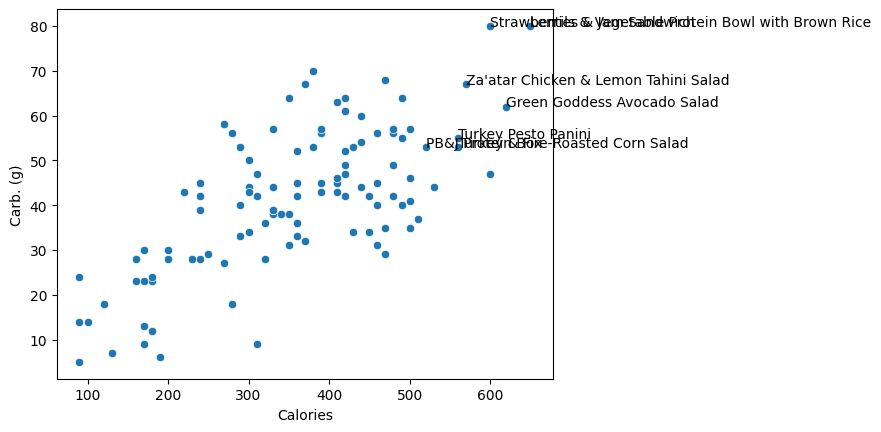

In [145]:
val = []

#ivariate graph for calories vs carbs
sns.scatterplot(food, x = 'Calories', y = 'Carb. (g)')
for i in range(len(food)):
  if food['Calories'].iloc[i]>500 and food['Carb. (g)'].iloc[i]>50:
    plt.text(food['Calories'].iloc[i], food['Carb. (g)'].iloc[i], food['Item'].iloc[i])
    val.append(food['Item'].iloc[i])
plt.show()

In [146]:
val

['Strawberries & Jam Sandwich',
 'Green Goddess Avocado Salad',
 'Turkey & Fire-Roasted Corn Salad',
 "Za'atar Chicken & Lemon Tahini Salad",
 'PB&J Protein Box',
 'Lentils & Vegetable Protein Bowl with Brown Rice',
 'Turkey Pesto Panini']

inference 2 : avoid foods high in calories and carbs, like above

for better analysis, go for trivariate graph, which gives based on all 3 factors

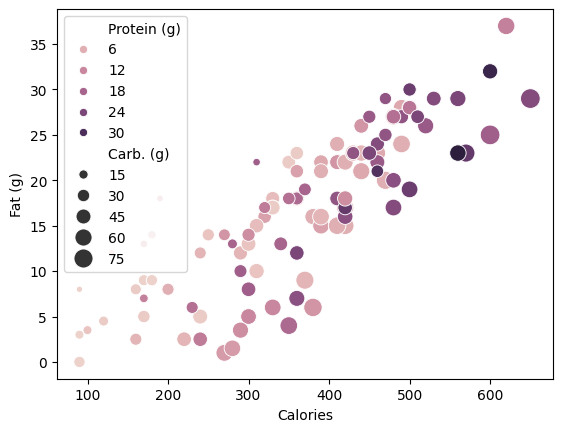

In [147]:
sns.scatterplot(food, x = 'Calories', y = 'Fat (g)', size = 'Carb. (g)', hue = 'Protein (g)', sizes = (20,200))
plt.show()

inference 3 : as proteins increases, calories increases

inference 4 : higher fat foods tend to have higher calories

EDA FOR DRINKS

In [148]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [149]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [150]:
drinks.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [151]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [152]:
for i in range(len(drinks.columns)):
  drinks.rename(columns = {drinks.columns[i] : drinks.columns[i].strip()}, inplace = True)

In [153]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [154]:
drinks_melted = pd.melt(drinks.select_dtypes(include = 'number'))

In [155]:
drinks_melted

,variable,value
0,Calories,3.0
1,Calories,4.0
2,Calories,5.0
3,Calories,5.0
4,Calories,70.0
...,...,...
2173,Protein (g),5.0
2174,Protein (g),4.0
2175,Protein (g),3.0
2176,Protein (g),3.0


In [156]:
drinks_melted['variable'].unique()

array(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)'], dtype=object)

In [157]:
drinks['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [158]:
drinks['Total Fat (g)'] = drinks['Total Fat (g)'].str.replace(' ', '.')

In [159]:
drinks['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3.2'], dtype=object)

In [160]:
drinks['Total Fat (g)'] = drinks['Total Fat (g)'].astype(float)

melted data is again reinitialised here since total fat has now only been covnerted to float from str

In [161]:
drinks['Vitamin A (% DV)'].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

In [162]:
drinks['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [163]:
drinks.isnull().sum()

,0
Beverage_category,0
Beverage,0
Beverage_prep,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Saturated Fat (g),0
Sodium (mg),0
Total Carbohydrates (g),0
Cholesterol (mg),0


In [164]:
drinks.loc[drinks['Caffeine (mg)'].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [165]:
drinks.loc[(drinks['Caffeine (mg)'] == 'Varies') | (drinks['Caffeine (mg)'] == 'varies') | (drinks['Caffeine (mg)'].isnull())]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6%,0%,10%,0.00%,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4%,0%,10%,6.00%,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10%,0%,20%,0.00%,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8%,0%,15%,0.00%,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,varies


In [166]:
len(drinks.loc[(drinks['Caffeine (mg)'] == 'Varies') | (drinks['Caffeine (mg)'] == 'varies') | (drinks['Caffeine (mg)'].isnull())])

23

In [167]:
drinks['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [168]:
avg = drinks.loc[(drinks['Caffeine (mg)'] != 'Varies') & (drinks['Caffeine (mg)']!='varies') & (drinks['Caffeine (mg)'].notnull())]['Caffeine (mg)'].astype(float).mean()

In [169]:
avg

89.52054794520548

In [170]:
drinks['Caffeine (mg)'] = drinks['Caffeine (mg)'].replace('Varies', avg.round())
drinks['Caffeine (mg)'] = drinks['Caffeine (mg)'].replace('varies', avg.round())
drinks['Caffeine (mg)'] = drinks['Caffeine (mg)'].fillna(avg.round())

In [171]:
drinks['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 90.0, '50', '70', '120', '55',
       '80', '110', '165', '235', '90', '125', '170', '15', '130', '140',
       '100', '145', '65', '105'], dtype=object)

In [172]:
drinks['Caffeine (mg)'] = drinks['Caffeine (mg)'].astype(float)

In [173]:
drinks_melted['variable'].unique()

array(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)'], dtype=object)

In [174]:
drinks['Vitamin A (% DV)'].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

In [175]:
drinks['Vitamin A (% DV)'] = drinks['Vitamin A (% DV)'].str.replace('%', '')
drinks['Vitamin C (% DV)'] = drinks['Vitamin C (% DV)'].str.replace('%', '')
drinks['Iron (% DV)'] = drinks['Iron (% DV)'].str.replace('%', '')
drinks['Calcium (% DV)'] = drinks['Calcium (% DV)'].str.replace('%', '')

In [176]:
drinks['Vitamin A (% DV)'] = drinks['Vitamin A (% DV)'].astype(float)
drinks['Vitamin C (% DV)'] = drinks['Vitamin C (% DV)'].astype(float)
drinks['Iron (% DV)'] = drinks['Iron (% DV)'].astype(float)
drinks['Calcium (% DV)'] = drinks['Calcium (% DV)'].astype(float)

In [177]:
drinks_melted = pd.melt(drinks.select_dtypes(include = 'number'))

In [178]:
drinks_melted['variable'].unique()

array(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)',
       'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)',
       'Iron (% DV)', 'Caffeine (mg)'], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


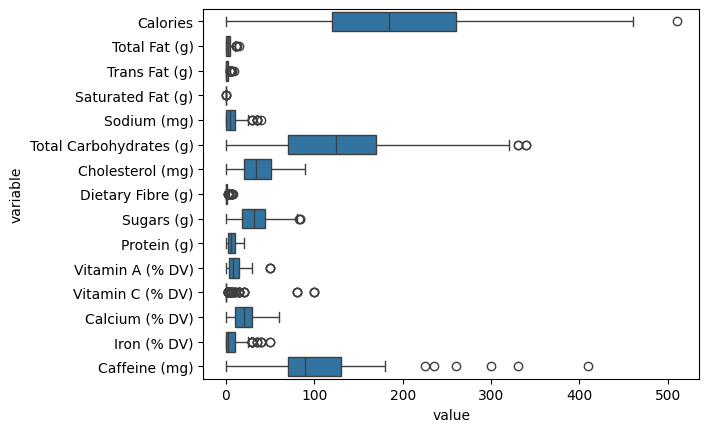

In [179]:
sns.boxplot(y = drinks_melted['variable'], x = drinks_melted['value'])
plt.show()

In [180]:
drinks_melted

,variable,value
0,Calories,3.0
1,Calories,4.0
2,Calories,5.0
3,Calories,5.0
4,Calories,70.0
...,...,...
3625,Caffeine (mg),0.0
3626,Caffeine (mg),0.0
3627,Caffeine (mg),0.0
3628,Caffeine (mg),0.0


In [181]:
corr = drinks.select_dtypes(include='number').corr()
corr

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Calories,1.000000,0.632785,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.406820,0.215433,0.518720,0.427153,-0.044875
Total Fat (g),0.632785,1.000000,0.890175,0.619264,0.587177,0.449546,0.372713,0.259380,0.330443,0.550480,0.320870,-0.029391,0.619749,0.512175,0.108062
Trans Fat (g),0.642818,0.890175,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.305293,-0.048238,0.489494,0.344880,0.132781
Saturated Fat (g),0.331047,0.619264,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.251557,-0.043146,0.287097,-0.066863,0.020254
Sodium (mg),0.387892,0.587177,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.459001,0.023867,0.462052,-0.101201,0.054227
Total Carbohydrates (g),0.795037,0.449546,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.311687,0.016623,0.404887,0.306757,0.065752
Cholesterol (mg),0.940034,0.372713,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,0.242821,0.223852,0.263574,0.356257,-0.107305
Dietary Fibre (g),0.384292,0.259380,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,0.280673,0.709267,0.147316,0.584519,-0.178787
Sugars (g),0.909675,0.330443,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,0.188738,0.118918,0.236040,0.260414,-0.093396
Protein (g),0.578453,0.550480,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.799796,0.360997,0.839942,0.358413,0.023144


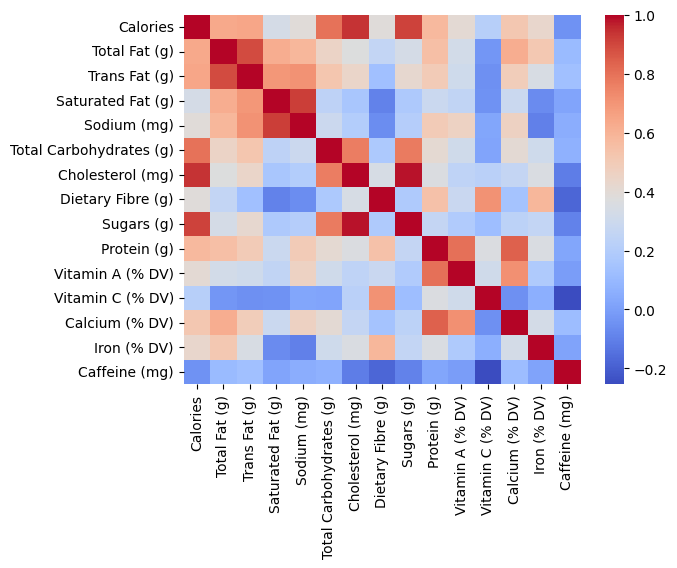

In [182]:
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [183]:
a = []
for i in range(len(corr)):
  for j in range(i+1,len(corr)):
    if(corr.iloc[i,j]>=0.8):
      a.append([corr.columns[i],corr.columns[j]])
a

[['Calories', 'Cholesterol (mg)'],
 ['Calories', 'Sugars (g)'],
 ['Total Fat (g)', 'Trans Fat (g)'],
 ['Saturated Fat (g)', 'Sodium (mg)'],
 ['Cholesterol (mg)', 'Sugars (g)'],
 ['Protein (g)', 'Calcium (% DV)']]

In [184]:
corr.shape

(15, 15)

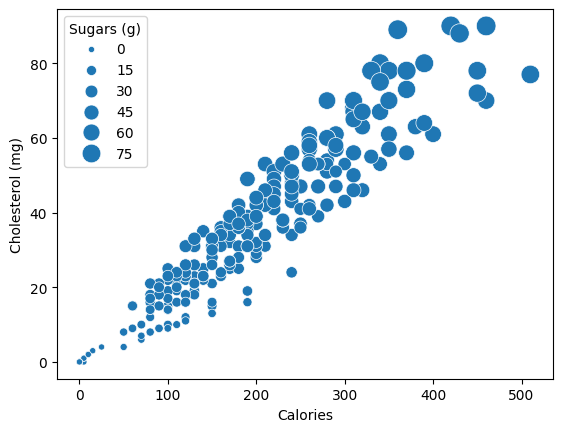

In [185]:
sns.scatterplot(drinks, x = 'Calories', y = 'Cholesterol (mg)', size = 'Sugars (g)', sizes = (20,200))
plt.show()

In [186]:
drinks.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281,89.566116
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467,61.560935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,70.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,90.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000,130.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000,410.000000


RECOMMENDING MEALS BASED ON INPUT PREFERENCE - KNN

In [187]:
from sklearn.neighbors import NearestNeighbors

In [188]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6.0,8.0,20.0,10.0,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0.0


In [189]:
food

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
...,...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1


In [190]:
combined_list = []

for i_food, d_food in food.iterrows():
  for i_drink, d_drink in drinks.iterrows():
    combined_list.append({
        'Food' : d_food['Item'],
        'Drink - category + beverage' : d_drink['Beverage_category'] + ', ' +  d_drink['Beverage'] + ', ' + d_drink['Beverage_prep'],
        'Total Calories' : d_food['Calories'] + d_drink['Calories'],
        'Total Fat' : d_food['Fat (g)'] + d_drink['Total Fat (g)'],
        'Total Carbs' : d_food['Carb. (g)'] + d_drink['Total Carbohydrates (g)'],
        'Total Protein' : d_food['Protein (g)'] + d_drink['Protein (g)'],
    })

In [191]:
combined_df = pd.DataFrame(combined_list)

In [192]:
combined_df.head()

,Food,Drink - category + beverage,Total Calories,Total Fat,Total Carbs,Total Protein
0,Chonga Bagel,"Coffee, Brewed Coffee, Short",303,5.1,55,12.3
1,Chonga Bagel,"Coffee, Brewed Coffee, Tall",304,5.1,60,12.5
2,Chonga Bagel,"Coffee, Brewed Coffee, Grande",305,5.1,60,13.0
3,Chonga Bagel,"Coffee, Brewed Coffee, Venti",305,5.1,60,13.0
4,Chonga Bagel,"Classic Espresso Drinks, Caffè Latte, Short No...",370,5.1,125,18.0


In [193]:
model = NearestNeighbors(n_neighbors = 4)
model.fit(combined_df[['Total Calories', 'Total Fat', 'Total Carbs', 'Total Protein']])

NearestNeighbors(n_neighbors=4)

In [194]:
user_nutritional_profile = [[500, 15, 50, 20]]
distance, indices = model.kneighbors(user_nutritional_profile)
combined_df.iloc[indices[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,Food,Drink - category + beverage,Total Calories,Total Fat,Total Carbs,Total Protein
17349,BBQ Chicken Protein Box,"Shaken Iced Beverages, Shaken Iced Tazo® Tea (...",500,16.0,49,22.0
21693,Seared Steak Egg & Tomatillo Wrap,"Shaken Iced Beverages, Iced Brewed Coffee (Wit...",500,18.1,48,21.3
18490,Smoked Turkey Protein Box,"Signature Espresso Drinks, Caramel Apple Spice...",500,12.0,52,24.0
22847,Spinach Feta & Cage Free Egg White Breakfast Wrap,"Signature Espresso Drinks, Caramel Apple Spice...",500,10.0,48,19.0


above are recommended combinations for users with nutritional preferences

**GENERATING NAMES USING MARKOV CHAIN**

In [195]:
drinks['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [196]:
drinks['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [197]:
drinks['Beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [198]:
categories = ['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks','Tazo® Tea Drinks','Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee','Frappuccino® Blended Crème']
modifiers = ['Hot', 'Iced', 'Without Whipped Cream', 'With Classic Syrup']
names = ['Brewed Coffee', 'Mocha', 'Latte', 'Espresso', 'Java Chip', 'Hot Chocolate', 'Strawberries & Crème']

**COMPARING WITH MCD DATASET**

In [199]:
mcd_menu = pd.read_csv('./menu.csv')

In [200]:
mcd_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [201]:
food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


trying to compare visually for calories, fats, carbs and proteins

In [202]:
food.isnull().sum()

,0
Item,0
Calories,0
Fat (g),0
Carb. (g),0
Fiber (g),0
Protein (g),0


In [203]:
mcd_menu.isnull().sum()

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


so, no null values

In [207]:
m = mcd_menu[['Item','Calories', 'Total Fat', 'Carbohydrates', 'Protein']]
s = food[['Item','Calories', 'Fat (g)', 'Carb. (g)', 'Protein (g)']]

In [208]:
m.head()

,Item,Calories,Total Fat,Carbohydrates,Protein
0,Egg McMuffin,300,13.0,31,17
1,Egg White Delight,250,8.0,30,18
2,Sausage McMuffin,370,23.0,29,14
3,Sausage McMuffin with Egg,450,28.0,30,21
4,Sausage McMuffin with Egg Whites,400,23.0,30,21


In [209]:
s.head()

,Item,Calories,Fat (g),Carb. (g),Protein (g)
0,Chonga Bagel,300,5.0,50,12
1,8-Grain Roll,380,6.0,70,10
2,Almond Croissant,410,22.0,45,10
3,Apple Fritter,460,23.0,56,7
4,Banana Nut Bread,420,22.0,52,6


In [210]:
s.rename(columns = {'Fat (g)' : 'Total Fat', 'Carb. (g)' : 'Carbohydrates', 'Protein (g)' : 'Protein'}, inplace = True)

<ipython-input-210-d0b41bce1d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.rename(columns = {'Fat (g)' : 'Total Fat', 'Carb. (g)' : 'Carbohydrates', 'Protein (g)' : 'Protein'}, inplace = True)


In [211]:
s.head()

,Item,Calories,Total Fat,Carbohydrates,Protein
0,Chonga Bagel,300,5.0,50,12
1,8-Grain Roll,380,6.0,70,10
2,Almond Croissant,410,22.0,45,10
3,Apple Fritter,460,23.0,56,7
4,Banana Nut Bread,420,22.0,52,6


bar chart

In [212]:
metrics = ['Calories', 'Total Fat', 'Carbohydrates', 'Protein']
mean_df = pd.DataFrame({'mcd' : m[metrics].mean(), 'starbucks' : s[metrics].mean()})

In [213]:
mean_df.head()

,mcd,starbucks
Calories,368.269231,356.637168
Total Fat,14.165385,16.353982
Carbohydrates,47.346154,41.486726
Protein,13.338462,11.469027


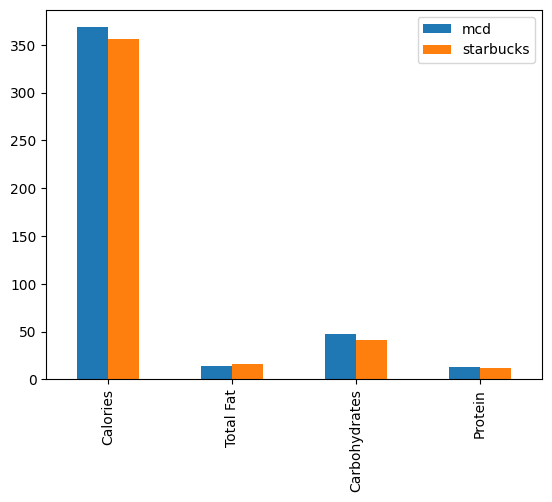

In [215]:
mean_df.plot(kind = 'bar')
plt.show()

In [220]:
import plotly.express as px

In [242]:
fig = px.line_polar(mean_df, r = 'mcd', theta = ['Calories', 'Total Fat', 'Carbohydrates', 'Protein'], line_close = True)
fig.update_traces(fill = 'toself', line_color = 'blue')
fig.add_trace(px.line_polar(mean_df, r = 'starbucks', theta = ['Calories', 'Total Fat', 'Carbohydrates', 'Protein'], line_close = True).data[0])
fig.update_traces(fill = 'toself', line_color = 'red')
fig.show()